In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline


Importamos funcion para leer CSV

In [3]:
df_train = pd.read_csv('train.csv')

Traemos las 10 primeras lineas de la BD para conocer el contexto

In [4]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Utilizamos Shape para conocer la dimension de la tabla

In [5]:
df_train.shape

(1460, 81)

Conocer una columna en específico

In [9]:
df_train[['SaleCondition','SalePrice']]

,SaleCondition,SalePrice
0,Normal,208500
1,Normal,181500
2,Normal,223500
3,Abnorml,140000
4,Normal,250000
...,...,...
1455,Normal,175000
1456,Normal,210000
1457,Normal,266500
1458,Normal,142125


Mean ayudara a indicar promedios del dataframe

In [10]:
df_train['SalePrice'].mean()

180921.19589041095

Resumen del dataframe .describe()

In [11]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


ANALIZAR PRECIO DE VENTA DE LAS CASAS

In [16]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

GRAFICAR PRECIO DE VENTA

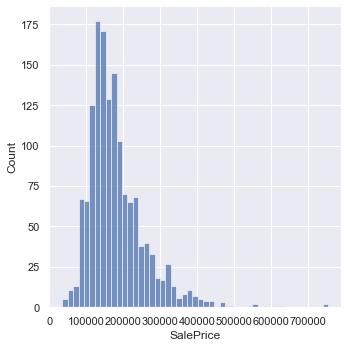

In [61]:
sns.displot(df_train['SalePrice'])

Conocer la skewness y kurtosis

In [18]:
 df_train['SalePrice'].skew()

1.8828757597682129

In [19]:
df_train['SalePrice'].kurt()

6.536281860064529

Analizamos Variable de precioVenta vs el areaVivienda

In [20]:
var='GrLivArea'

pd.concat para crear tabla con las dos variables

In [21]:
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)

In [22]:
data.head(5)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

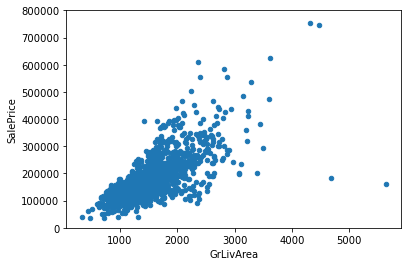

In [24]:
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

Analisis: Podemos inducir un grafico linear entre las variables de SalePrice y GrLivArea, lo que nos demuestra la coherencia del precio de la vivienda comparado del lugar donde esta ubicada.

Relacionar Precio de la venta vs el Area sotano

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

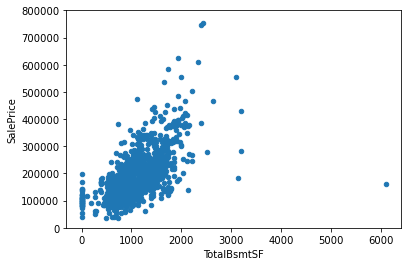

In [25]:
var='TotalBsmtSF'
data= pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

Analisis: El grafico no muestra una base tan lineal como el anterior, de igual manera la relacion entre estas dos variables nos muestran informacion relevante ya que una gran masa de datos nos indican que dependiendo del sotano de la vivienda puede estar altamente relacionado con su valor

Grafico boxplot Calidad de las casas en relacion con su valor

In [27]:
var='OverallQual'

In [28]:
data= pd.concat([df_train["SalePrice"],df_train[var]],axis=1)

(-0.5, 9.5, 0.0, 800000.0)

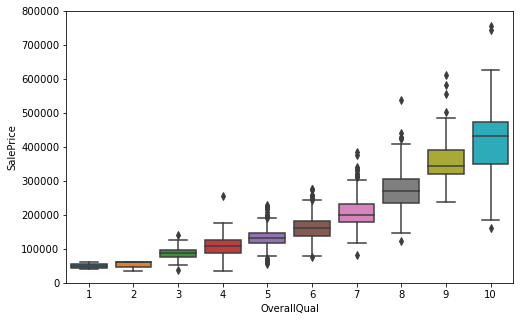

In [30]:
f,ax =plt.subplots(figsize=(8,5))
fig= sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis (ymin=0,ymax=800000)

Analisis: Esta variable categorica (estado de la vivienda), es MUY categorica para poder señalar el valor de la vivienda

Grafico boxplot Año de construccion

In [31]:
var='YearBuilt'

In [32]:
data= pd.concat([df_train["SalePrice"],df_train[var]],axis=1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

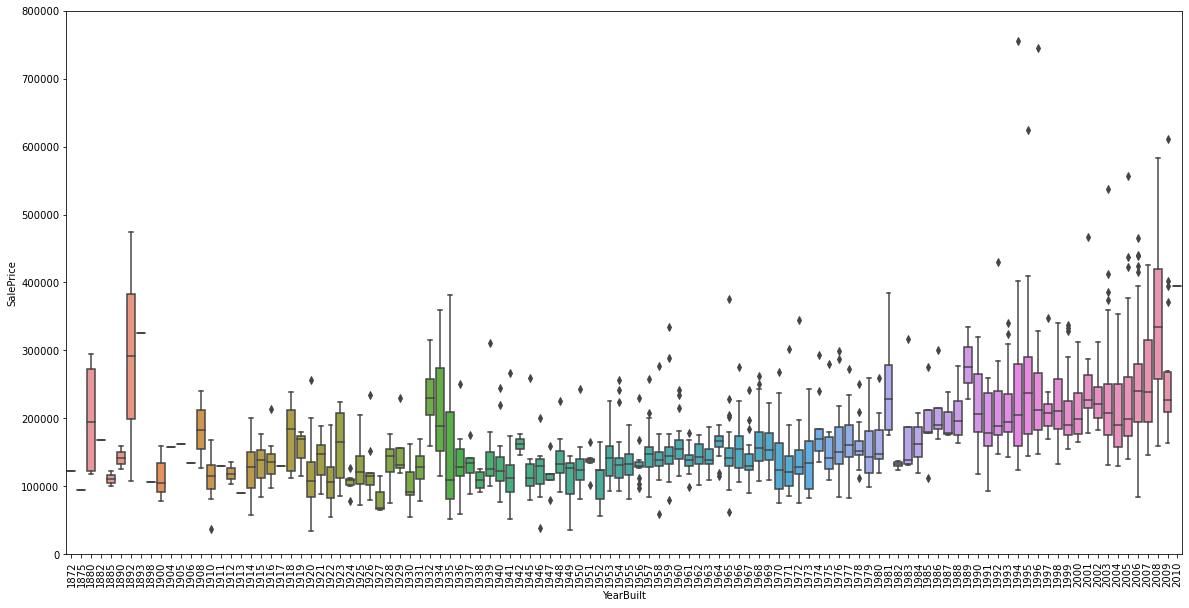

In [38]:
f,ax =plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis (ymin=0,ymax=800000)
plt.xticks(rotation=90)

Analisis: La tendencia nos indica que las vivienda desde el año 1990 al año 2010 son las viviendas con mayor valor por la baja antiguedad, no obstante existen algunas anomalias... como lo son acasas de los años 1930 y casas de los años 1870- 1890, las cuales podemos inducir que tienen un valor extra debido a patrimonos o antiguedades con valor agregado.

Matriz de Correlacion para buscar variables correlacionadas

In [39]:
corrmat= df_train.corr()

<AxesSubplot:>

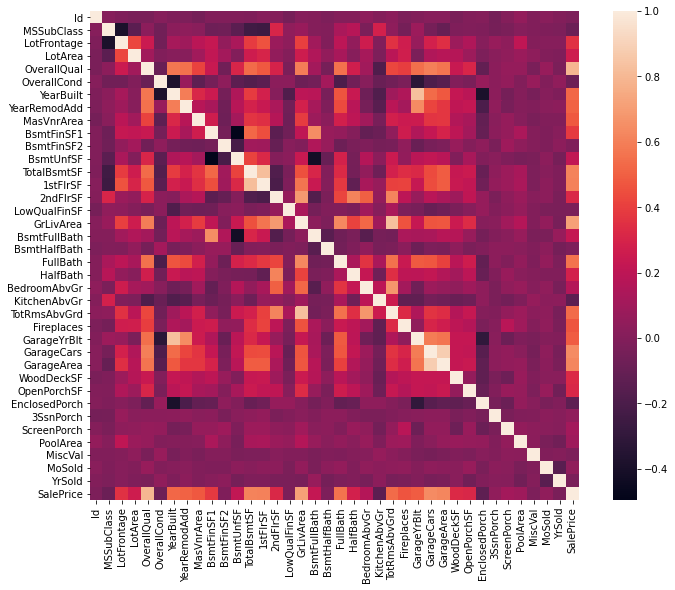

In [42]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True)

Analisis: Variable principal 'SalePrice', variables altamente relacionadas: 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'

VARIABLES MAS RELACIONADAS EN MATRIZ DE CORRELACION

In [44]:
v=10

In [45]:
cols= corrmat.nlargest(v,"SalePrice")["SalePrice"].index

In [46]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

creacion del arreglo de correlacion

In [47]:
cm=np.corrcoef(df_train[cols].values.T)

In [48]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

Indicar tamaño de la fuente(1.25)

In [50]:
sns.set(font_scale=1.25)

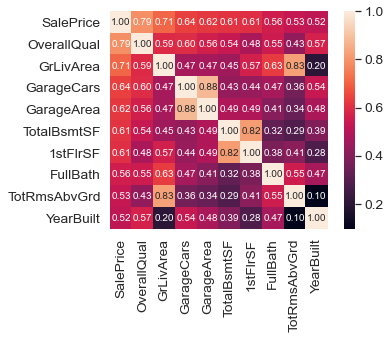

In [56]:
hm= sns.heatmap(cm,cbar=True, annot=True,square=True,fmt=".2f",annot_kws={"size":10,},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Analisis: Las variables mas correlacionadas a 'SalePrice' son la calidad de la vivienda('OverallQual') y el lugar donde esta ubicada la vivienda('GrLivArea'). Las variables las relacionadas en una segunda linea serian las viviendas que cuentan con un Garage amplio ('GarageCars'y 'GarageArea') y tambien muy relevante la variable del sotano ('TotalBsmtSF')

Scatter Plots entre SalePrice y variables altamente correlacionadas

In [57]:
sns.set()

In [58]:
cols= ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath','YearBuilt']

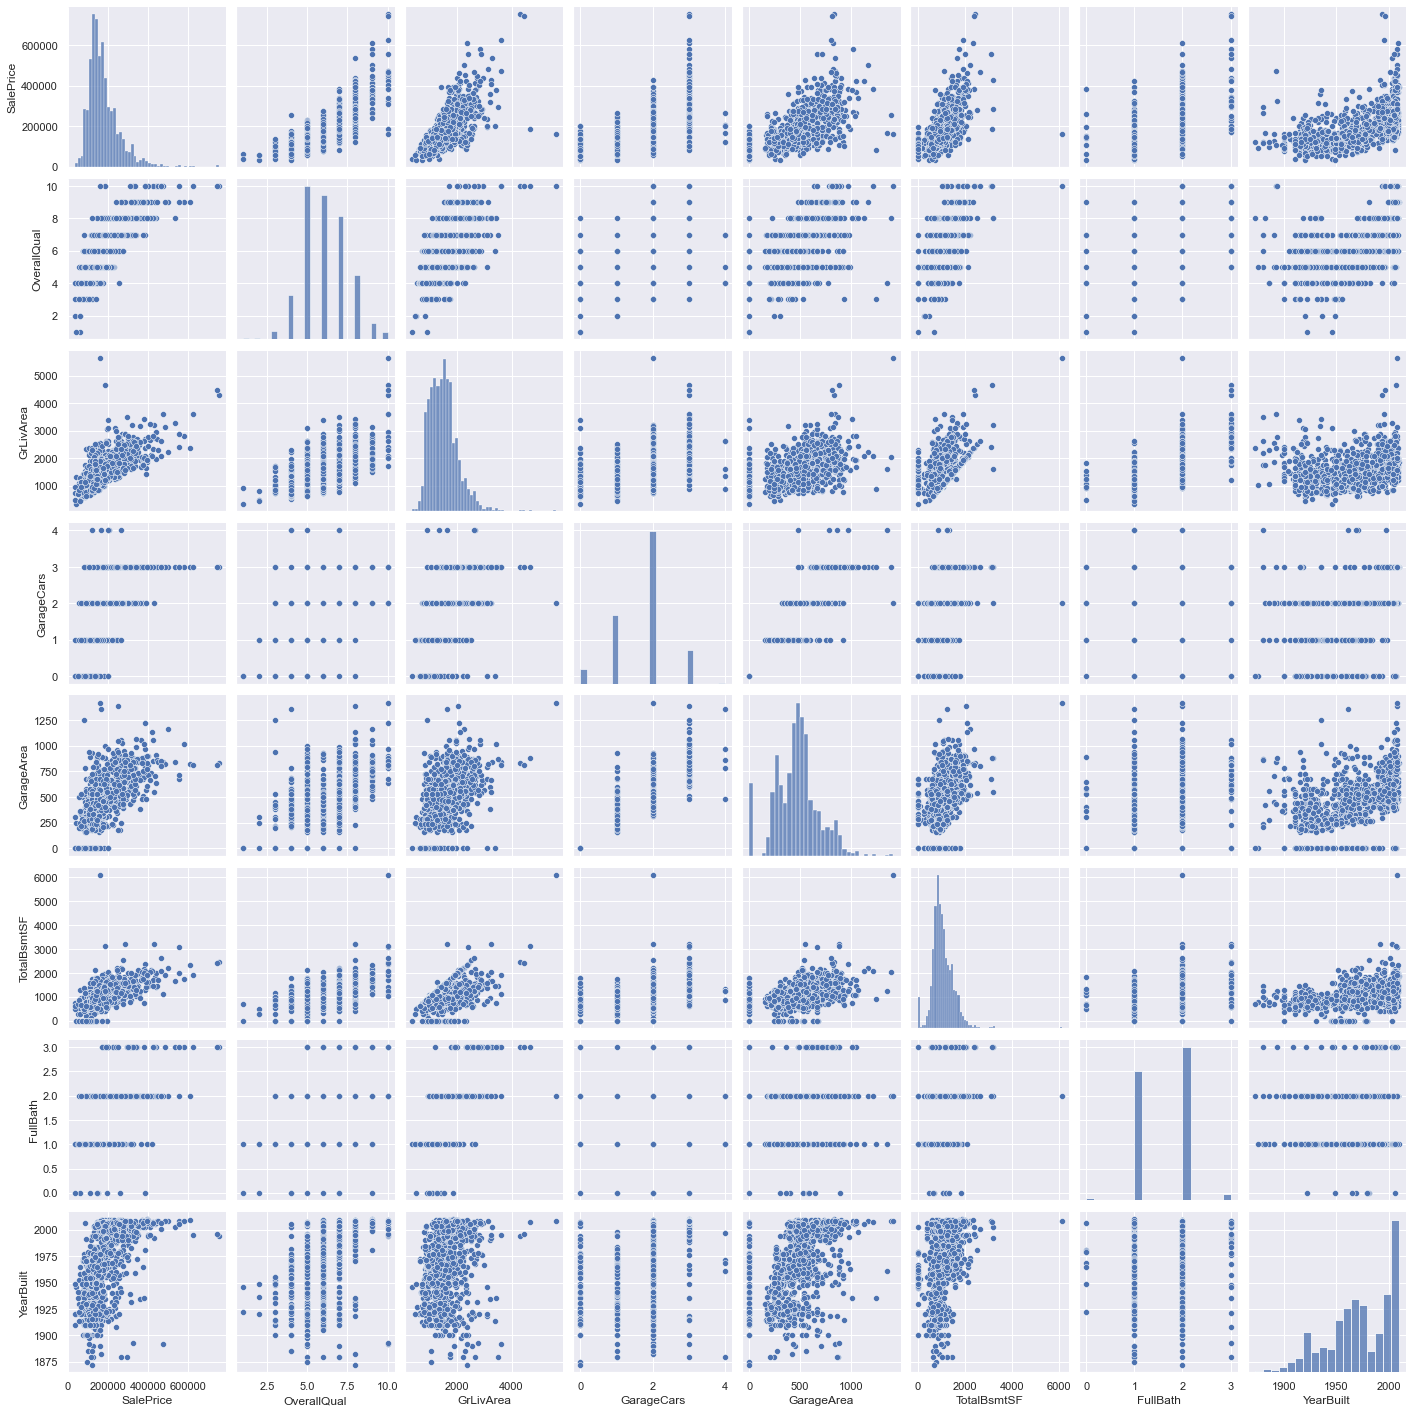

In [60]:
sns.pairplot(df_train[cols],height=2.5)
plt.show()

Analisis: La variable SalePrice sigue estando directamente relacioanda con La calidad y el area donde esta ubicada. Variables de antiguedad muestran algunas anomalias pero en general muestran que entre mas nuev al vivienda mas alto es su precio, de igual manera entre mas tamaño de sotano y de Garage suele aumentar el precio de las viviendas.